# 1. Data Import – File Description

We’ll be working with a dataset containing information about **user behavior or events**, aimed at performing an **A/A/B test** to analyze how users reach the purchase stage.

Below is a description of the file contents:

**File:** Events (User Behavior)

- **EventName:** Name of the event.  
- **DeviceIDHash:** Unique user identifier.  
- **EventTimestamp:** Event timestamp.  
- **ExpId:** Experiment ID. 246 and 247 correspond to control groups (Group A), while 248 represents the test group (Group B).


In [1]:
# Import the pandas library to read the data files.
import pandas as pd

events = pd.read_csv('/datasets/logs_exp_us.csv', sep = '\t')

# 2. Data Cleaning

We’ll review the data types present in the DataFrame to ensure they match the expected formats.  
Additionally, we’ll identify any missing or incorrect values that may require cleaning or correction.

The processes to be performed are:
1. Check data types and null values.  
2. Rename columns to improve data analysis and understanding.  
3. Create a new column containing only the date (excluding time).


In [2]:
# Display the first 5 rows of the dataset  
print(events.head())
print()
# Check for null values and data types
print(events.info())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


**Observation:** No null values were identified in the analyzed table, but an improvement was made to the data type of the **'EventTimestamp'** column to properly meet the analysis requirements.


In [3]:
# Change the data type of the 'EventTimestamp' column  
events['EventTimestamp'] = pd.to_datetime(events['EventTimestamp'], unit='s')

# Display the first 5 rows of the dataset  
print(events.head())
print()
# Verify the data types
print(events.info())

                 EventName         DeviceIDHash      EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36    246
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42    246
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47    248
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47    248
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42    248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   EventName       244126 non-null  object        
 1   DeviceIDHash    244126 non-null  int64         
 2   EventTimestamp  244126 non-null  datetime64[ns]
 3   ExpId           244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB
None


**Observation:** All data types are consistent with the requirements of the analysis to be performed later.

## 2.2 Renaming the columns

In [4]:
# Rename all column names  
events = events.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'time_event',
    'ExpId': 'groups'
})

# Display the changes
print(events.head())

                event_name              user_id          time_event  groups
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248


## 2.3 Add the date-only column  

In [5]:
# Create the 'date_event' column to store only the dates  
events['date_event'] = events['time_event'].dt.date
# Display the final table
print(events.head())

                event_name              user_id          time_event  groups  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36     246   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42     246   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47     248   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47     248   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42     248   

   date_event  
0  2019-07-25  
1  2019-07-25  
2  2019-07-25  
3  2019-07-25  
4  2019-07-25  


**Conclusions:**

We have transformed the data to make it easier to analyze:
* Converted the timestamp field (**EventTimestamp**) into a readable date-time format (**time_event**).  
* Standardized column names to **snake_case**, improving consistency and making further analysis easier.  
* Created a new column (**date_event**) containing only the date, useful for daily aggregated analysis.

With these transformations, the dataset is now cleaner, more structured, and ready for exploratory analysis.

# 3. Data Verification

## 3.1 How many events are recorded in the dataset?


In [6]:
# Identify how many unique events exist  
unique_event = events['event_name'].nunique()

# Count the number of records per event 
count_events = events['event_name'].value_counts()

# Calculate the total number of records by event  
total_start = count_events.sum()
count_events['Total'] = count_events.sum()

print(f'There are: {unique_event} events')
print(count_events)

There are: 5 events
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Total                      244126
Name: event_name, dtype: int64


## 3.2 How many users are recorded in the dataset?


In [7]:
# Count and identify the number of users  
start_user = events['user_id'].nunique()
count_user = events['user_id'].nunique()

print(f'There are: {count_user} users')

There are: 7551 users


## 3.3 What is the average number of events per user?  

In [8]:
# Calculate the total number of events  
total_events = events.shape[0]

# Compute the average number of events per user 
media_events = total_events / count_user

print("Average events per user:", round(media_events,2))

Average events per user: 32.33


## 3.4 What time period does the data cover?

Fecha mínima: 2019-07-25
Fecha máxima: 2019-08-07


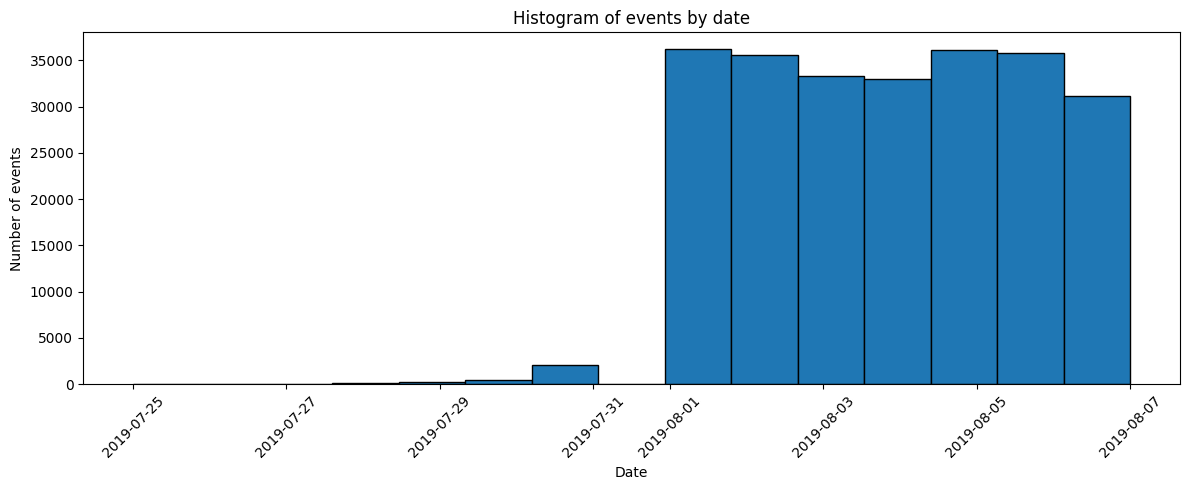

In [9]:
# Calculate the minimum and maximum dates  
date_min = events['date_event'].min()
date_max = events['date_event'].max()

print("Fecha mínima:", date_min)
print("Fecha máxima:", date_max)

# Import the matplotlib library for visualization 
import matplotlib.pyplot as plt

# Count the number of events per date  
count_date = events['date_event'].value_counts().sort_index()

# Plot a histogram of events by date 
plt.figure(figsize=(12,5))
plt.hist(events['date_event'], bins=15, edgecolor="black")
plt.title("Histogram of events by date")
plt.xlabel("Date")
plt.ylabel("Number of events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Truly representative period: 2019-08-01  →  2019-08-07


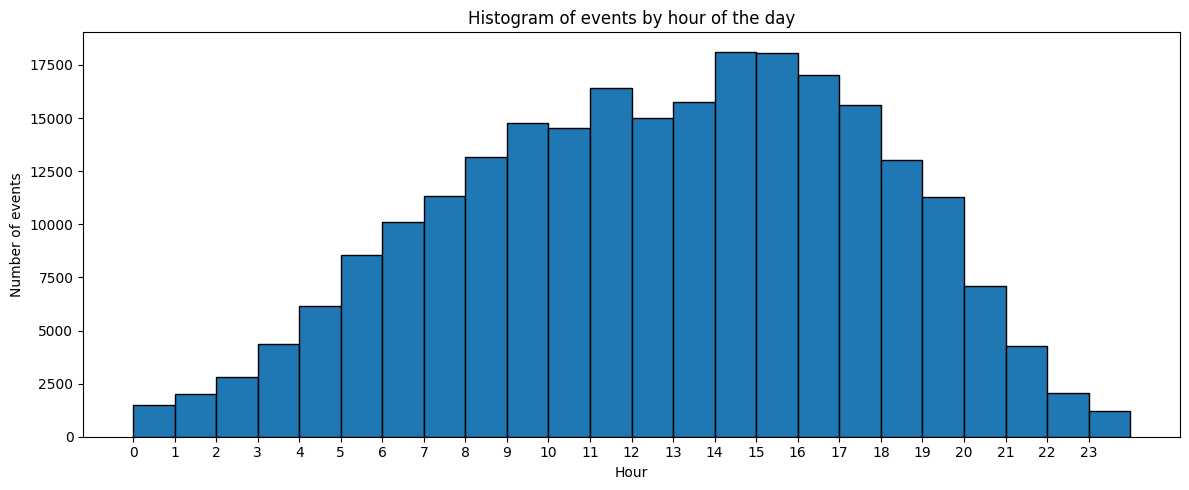

In [10]:
# Calculate the threshold (50th percentile) 
umbral = count_date.quantile(0.5)

# Identify the "complete" dates
real_date = count_date[count_date >= umbral]
real_min_date = real_date.index.min()
real_max_date = real_date.index.max()

print("Truly representative period:", real_min_date, " → ", real_max_date)

# Plot the histogram of events by hour of the day  
plt.figure(figsize=(12,5))
plt.hist(events['time_event'].dt.hour, bins=24, range=(0,24), edgecolor="black")
plt.title("Histogram of events by hour of the day")
plt.xlabel("Hour")
plt.ylabel("Number of events")
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()

## 3.5 Loss of Events and Users  

First, we will remove the records from the DataFrame with dates earlier than **'2019-08-01'** (excluding this date) in order to determine the amount of data loss and improve the accuracy of subsequent analyses.

In [11]:
# Identify the reference date  
fecha_inicio = pd.to_datetime("2019-08-01").date()

# Filter the records
events = events[events['date_event'] >= fecha_inicio]

# Verify the modification  
print('Start date: ', events['date_event'].min())
print('End date: ', events['date_event'].max())
print()

# Count the current number of records by event  
count_events = events['event_name'].value_counts()

# Calculate the updated total number of records by event
total_end = count_events.sum()
count_events['Total'] = count_events.sum()

print(count_events)
print()

# Calculate the percentage of data loss
lost_percent_event = ((total_start - total_end)/total_start)*100

# Calculate the number of lost events
lost_amount_event = total_start - total_end

print(f'A total of {round(lost_percent_event,2)}% of events were lost, equivalent to {lost_amount_event} events out of the {total_start} initial events.')

Start date:  2019-08-01
End date:  2019-08-07

MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Total                      241298
Name: event_name, dtype: int64

A total of 1.16% of events were lost, equivalent to 2828 events out of the 244126 initial events.


In [12]:
# Count and identify the number of users
end_user = events['user_id'].nunique()
count_user = events['user_id'].nunique()

# Count and identify the number of users
lost_percent_user = ((start_user - end_user)/start_user)*100
# Calculate the number of lost users
lost_amount_user = start_user - end_user

print(f'A total of {round(lost_percent_user,2)}% of users were lost, equivalent to {lost_amount_user} users out of the {start_user} initial users.')

A total of 0.23% of users were lost, equivalent to 17 users out of the 7551 initial users.


**Conclusions:**  
The exclusion of older data outside the relevant date range did not result in a significant loss for the analysis.  
Only **1.16% of events** (equivalent to 2,828 records) and **0.23% of users** (corresponding to 17 users) were removed — values that do not have a meaningful impact on the integrity or representativeness of the dataset.

# 3.6 Users in the Experimental Groups

In [13]:
# Calculate the unique users per group 
user_by_group = events.groupby('groups')['user_id'].nunique()

print(f'Unique users by group:')
print(user_by_group)

Unique users by group:
groups
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


**Observation:** It was verified that all experimental groups contain users.

# 4. Event Funnel

In this stage, several event-related data will be filtered, and analyses will be performed for each event.

## 4.1 Event Frequency

In [14]:
# Reset the indexes 
count_events = count_events.reset_index()

# Rename columns for better clarity
count_events.columns = ['event_name', 'count']

print(count_events)

                event_name   count
0         MainScreenAppear  117431
1       OffersScreenAppear   46350
2         CartScreenAppear   42365
3  PaymentScreenSuccessful   34113
4                 Tutorial    1039
5                    Total  241298


## 4.2 Proportion of Users vs. Events

In [15]:
# Identify unique users by event type
user_by_event = events.groupby('event_name')['user_id'].nunique().reset_index()

# Rename columns for better clarity
user_by_event.columns = ['event_name', 'unique_users']

# Calculate the proportion of users per event
user_by_event['proportion'] = (user_by_event['unique_users']/count_user).round(2)

# Sort events by the number of users
user_by_event = user_by_event.sort_values(by='unique_users', ascending = False)

print(user_by_event)

                event_name  unique_users  proportion
1         MainScreenAppear          7419        0.98
2       OffersScreenAppear          4593        0.61
0         CartScreenAppear          3734        0.50
3  PaymentScreenSuccessful          3539        0.47
4                 Tutorial           840        0.11


## 4.3 Event Sequence

I consider that the order of the events is as follows:
1. MainScreenAppear  
2. OffersScreenAppear  
3. CartScreenAppear  
4. PaymentScreenSuccessful  

The observed events correspond to the typical sequence followed by an average user when completing a successful purchase within the application.  
However, not all users go through every step of this flow.  

Additionally, the **“Tutorial”** event does not seem to be part of the main user journey; instead, it behaves as an optional and independent action, given the low level of user interaction with it.

## 4.4 Proportion of Users from One Stage to Another

In [16]:
# Filter only the events from the main sequence 
user_by_event = user_by_event[user_by_event['event_name'] != 'Tutorial']

# Calculate the proportions between each consecutive event
user_by_event['conversion_events'] = (user_by_event['unique_users'] / user_by_event['unique_users'].shift(1)).round(2)

print(user_by_event[['event_name','unique_users','conversion_events']])

                event_name  unique_users  conversion_events
1         MainScreenAppear          7419                NaN
2       OffersScreenAppear          4593               0.62
0         CartScreenAppear          3734               0.81
3  PaymentScreenSuccessful          3539               0.95


**Observations:**  
The first row appears as *NaN* because it has no previous step, while the others show the proportion of users advancing from one stage to the next.

**Conclusions:**  
The largest drop occurs between **MainScreen** and **OffersScreen** (**38% loss**). From that point onward, conversion rates are high — most users who view offers proceed to the cart, and nearly all who enter the cart complete the payment.

On a positive note, the main flow is well optimized in its final stages, but there’s an opportunity for improvement in getting more users to move from the initial screen to the offers screen.

## 4.5 Percentage of Users Who Complete the Sequence

In [17]:
# Filter users from the first and last events in the sequence
start_users = user_by_event.loc[user_by_event['event_name'] == 'MainScreenAppear', 'unique_users'].values[0]
finish_users = user_by_event.loc[user_by_event['event_name'] == 'PaymentScreenSuccessful', 'unique_users'].values[0]

# Calculate the percentage of users who completed the sequence
sequence_completed = round((finish_users / start_users) * 100, 2)

print("The percentage of users who completed the entire sequence is:", sequence_completed, "%")

The percentage of users who completed the entire sequence is: 47.7 %


# 5. Experiment Results

## 5.1 Users per Group

In [18]:
print(user_by_group)

groups
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


**Observations:**  
Group 246 (A) has a total of **2,484 unique users**, group 247 (A) has **2,513 unique users**, and finally, group 248 (B) has **2,537 unique users**.

## 5.2 Statistical Difference – A/A Test

In [19]:
# Filter the data for each group 
group_246 = events[events['groups'] == 246]
group_247 = events[events['groups'] == 247]

# Count the number of events per user in each group
events_246 = group_246.groupby('user_id')['event_name'].count()
events_247 = group_246.groupby('user_id')['event_name'].count()

# Import the scipy library for statistical calculations
from scipy import stats

# Define the significance level
alpha = 0.05

# Calculate the t-test and p-value
t_stat, p_value = stats.ttest_ind(events_246, events_247, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if (p_value < alpha):
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no significant difference, which is the expected outcome in an A/A test.")

t-statistic: 0.0
p-value: 1.0
There is no significant difference, which is the expected outcome in an A/A test.


**Observations:**  
This confirms that the experiment is well-designed, and we can trust that the assignment and measurement mechanisms are working correctly.

## 5.3 Most Popular Event

In [20]:
# Identify the most popular event 
popular_event = events['event_name'].value_counts().idxmax()
print("The most popular event is:", popular_event)

# Import the proportions_ztest library 
from statsmodels.stats.proportion import proportions_ztest

# Create a custom function
def comparison_events(evento, df):
    
    # Filter users by group and event
    g246 = df[(df['groups'] == 246) & (df['event_name'] == evento)]['user_id'].nunique()
    g247 = df[(df['groups'] == 247) & (df['event_name'] == evento)]['user_id'].nunique()
    
    # Calculate the total number of users per group 
    total246 = df[df['groups'] == 246]['user_id'].nunique()
    total247 = df[df['groups'] == 247]['user_id'].nunique()
    
    # Calculate the proportions 
    prop246 = g246 / total246
    prop247 = g247 / total247
    
    # Perform the statistical test for difference in proportions (z-test)
    count = [g246, g247]
    nobs = [total246, total247]
    stat, pval = proportions_ztest(count, nobs)

    # Define the output of the custom function
    return {
        "evento": evento,
        "usuarios_246": g246,
        "usuarios_247": g247,
        "proporcion_246": round(prop246, 2),
        "proporcion_247": round(prop247, 2),
        "p_value": round(pval, 2)
    }

The most popular event is: MainScreenAppear


In [21]:
resultados = [comparison_events(e, events) for e in events['event_name'].unique()]
df_resultados = pd.DataFrame(resultados)

print(df_resultados)

                    evento  usuarios_246  usuarios_247  proporcion_246  \
0                 Tutorial           278           283            0.11   
1         MainScreenAppear          2450          2476            0.99   
2       OffersScreenAppear          1542          1520            0.62   
3         CartScreenAppear          1266          1238            0.51   
4  PaymentScreenSuccessful          1200          1158            0.48   

   proporcion_247  p_value  
0            0.11     0.94  
1            0.99     0.76  
2            0.60     0.25  
3            0.49     0.23  
4            0.46     0.11  


**Observations:**  

The most popular event is: **MainScreenAppear**  

Since all the *p_values* for each event are greater than 0.05 (significance level), it can be determined that there is **no significant difference** between groups 246 and 247.  
This indicates that the groups are **well balanced and properly divided**.

## 5.4 A/B and A/A/B Test

In [22]:
# Prepare the groups by creating an auxiliary column 
events['group_combined'] = events['groups'].replace({246: 'control', 247: 'control', 248: 'test'})

# Create a new custom function 
def comparison_test_vs_control(evento, df):
    resultados = []

    # Filter the data by group
    total_246 = df[df['groups'] == 246]['user_id'].nunique()
    total_247 = df[df['groups'] == 247]['user_id'].nunique()
    total_248 = df[df['groups'] == 248]['user_id'].nunique()
    total_control = df[df['groups'].isin([246, 247])]['user_id'].nunique()
    
    users_246 = df[(df['groups'] == 246) & (df['event_name'] == evento)]['user_id'].nunique()
    users_247 = df[(df['groups'] == 247) & (df['event_name'] == evento)]['user_id'].nunique()
    users_248 = df[(df['groups'] == 248) & (df['event_name'] == evento)]['user_id'].nunique()
    users_control = df[(df['groups'].isin([246, 247])) & (df['event_name'] == evento)]['user_id'].nunique()
    
    # Compare test vs. control 246 (A/B)
    stat1, pval1 = proportions_ztest([users_248, users_246], [total_248, total_246])
    # Compare test vs. control 247 (A/B)
    stat2, pval2 = proportions_ztest([users_248, users_247], [total_248, total_247])
    # Compare test vs. combined controls (A/A/B)
    stat3, pval3 = proportions_ztest([users_248, users_control], [total_248, total_control])

    resultados.append({
        "evento": evento,
        "proporcion_246": round(users_246 / total_246, 2),
        "proporcion_247": round(users_247 / total_247, 2),
        "proporcion_248": round(users_248 / total_248, 2),
        "pval_vs_246": round(pval1, 2),
        "pval_vs_247": round(pval2, 2),
        "pval_vs_control_total": round(pval3, 2)
    })
    
    return resultados

In [23]:
# Run the analysis for all events
resultados_test = []
for e in events['event_name'].unique():
    resultados_test.extend(comparison_test_vs_control(e, events))

df_test = pd.DataFrame(resultados_test)
print(df_test)

                    evento  proporcion_246  proporcion_247  proporcion_248  \
0                 Tutorial            0.11            0.11            0.11   
1         MainScreenAppear            0.99            0.99            0.98   
2       OffersScreenAppear            0.62            0.60            0.60   
3         CartScreenAppear            0.51            0.49            0.48   
4  PaymentScreenSuccessful            0.48            0.46            0.47   

   pval_vs_246  pval_vs_247  pval_vs_control_total  
0         0.83         0.77                   0.76  
1         0.29         0.46                   0.29  
2         0.21         0.92                   0.43  
3         0.08         0.58                   0.18  
4         0.21         0.74                   0.60  


**Conclusions:**  

The test group (248) shows **no significant differences** compared to the control groups across any of the main events (MainScreen, Offers, Cart, Payment).  

The only slight indication of a difference appears in **CartScreenAppear**, where the test group shows a slightly lower proportion (0.48 vs. 0.51 in control 246).  
However, the p-value (0.08) is not low enough to be considered statistically significant at a standard 95% confidence level.  

Overall, we can conclude that the **font variation (group 248)** did **not have a statistically significant impact** on user behavior.

## 5.5 Significance Levels

In [24]:
import math

# Declare the number of events analyzed  
num_events = 5

# Declare the number of comparisons per event 
comparisons_by_event = 3

# Calculate the total number of tests performed
total_test = num_events * comparisons_by_event

# Define the standard significance level
alpha_default = 0.05

# Significance level test 
alpha_test = 0.1
false_positive = total_test * alpha_test

# Apply the Bonferroni correction
alpha_bonferroni = alpha_default / total_test

print("Number of tests performed:", total_test)  
print("Standard significance level (alpha):", alpha_default)  
print("With alpha = 0.1, expected false positives:", false_positive)  
print("Bonferroni-adjusted alpha:", round(alpha_bonferroni, 4))

Number of tests performed: 15
Standard significance level (alpha): 0.05
With alpha = 0.1, expected false positives: 1.5
Bonferroni-adjusted alpha: 0.0033


**Conclusions:**  

When reviewing the obtained p-values (all ≥ 0.08), even with α = 0.1 there is no statistical significance, except for the weak signal in **CartScreenAppear (p = 0.08)**.  

With α = 0.05, that difference would no longer be significant.  
With the adjusted α (0.0033), even less so.  

In other words, the conclusions remain unchanged — there are **no significant differences between the groups**.  

The most reasonable approach is to maintain **α = 0.05**.  
Under any of these significance thresholds, the results remain consistent: there is **no evidence that the font variation had any impact on user behavior**.